In [2]:
from sklearn.datasets import make_classification
import numpy as np

X, Y = make_classification(
    n_samples=100,
    n_features=2,
    random_state=32,
    weights=[0.91, 0.09],
    return_X_y=True,
    n_redundant=0,
    n_repeated=0,
    n_informative=2,
)

# Using Z-Score

In [3]:
means = X.mean()
stds = X.std()

z_scores = (X - means) / stds

In [4]:
z_score_threshold = 2

outliers_mask = (np.abs(z_scores) > z_score_threshold).any(axis=1)



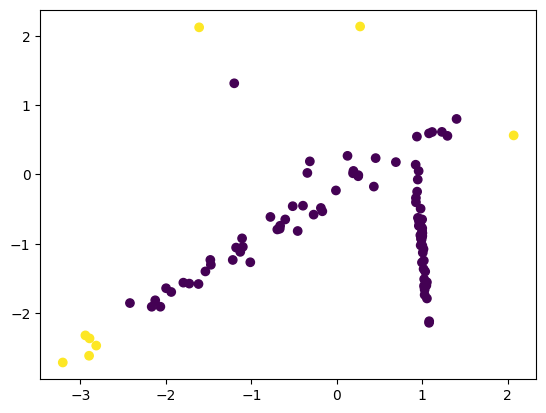

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=outliers_mask)

# Using K-Nearest Neighour

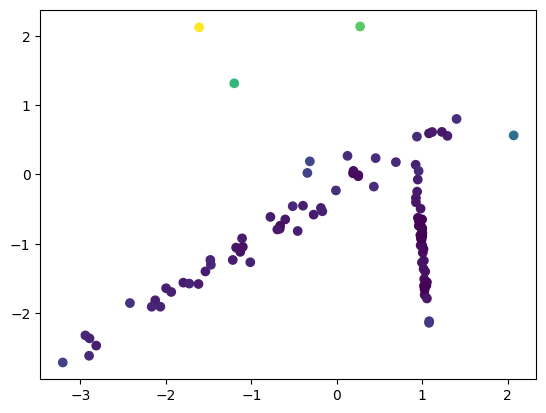

In [6]:
from sklearn.neighbors import NearestNeighbors

K = 4

nn = NearestNeighbors(n_neighbors=K)

nn.fit(X)

distances, _ = nn.kneighbors(X)

k_distances = distances[:,K-1]

plt.scatter(X[:,0],X[:,1],c=k_distances)

## Uisng K-Average Distances

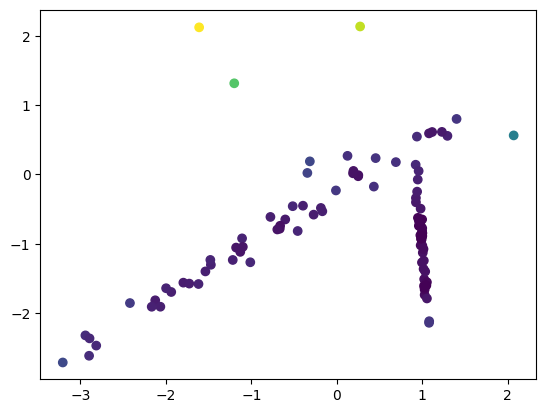

In [15]:
from sklearn.neighbors import NearestNeighbors

K = 5

nn = NearestNeighbors(n_neighbors=K)

nn.fit(X)

distances, _ = nn.kneighbors(X)

k_distances = distances[:,1:]

k_average_dist = k_distances.mean(axis=1)

plt.scatter(X[:,0],X[:,1],c=k_average_dist)

# Density Based Approach

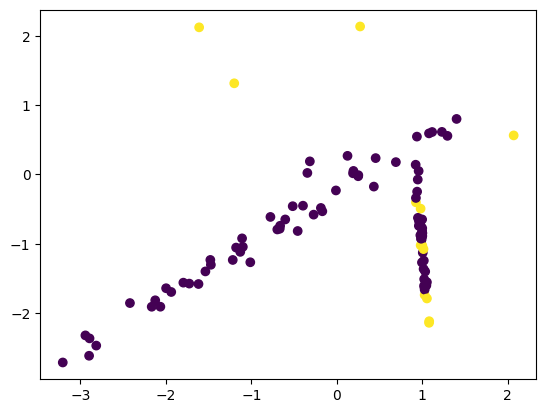

In [17]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=K)
anomaly_score = -lof.fit_predict(X)  # -1 = anomaly


plt.scatter(X[:,0],X[:,1],c=anomaly_score)